### Produce Hovmoeller Plot

**For Figure 3b**

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
# import importlib
# importlib.reload(my_classes)

from tensorflow.keras.models import load_model
import tensorflow as tf

root_path = '/pf/b/b309170'
# Add path with my_classes to sys.path
sys.path.insert(0, root_path + '/workspace_icon-ml/cloud_cover_parameterization/')

from my_classes import read_mean_and_std
from my_classes import load_data

import matplotlib.pyplot as plt

%config Completer.use_jedi = False  #Speeds up autocomplete

In [38]:
import matplotlib

# Increase the general font size in plots
size_plots_label = 34
matplotlib.rcParams['legend.fontsize'] = size_plots_label
matplotlib.rcParams['axes.labelsize'] = size_plots_label # For an axes xlabel and ylabel
matplotlib.rcParams['axes.titlesize'] = size_plots_label+2 # For an axes xlabel and ylabel
matplotlib.rcParams['xtick.labelsize'] = size_plots_label
matplotlib.rcParams['ytick.labelsize'] = size_plots_label

# Averaged over the NARVAL region
zg_mean_narval = [20785,19153,17604,16134,14741,13422,12175,10998,9890,8848,
                  7871,6958,6107,5317,4587,3915,3300,2741,2237,1787,1390,1046,
                  754,515,329,199,128] # in meters

zg_mean_narval = np.round(np.array(zg_mean_narval)/1000, decimals=1) # in kilometers

# Averaged globally
zg_mean_qubicc = [20785,19153,17604,16134,14742,13424,12178,11002,9896,8857,
                  7885,6977,6133,5351,4630,3968,3363,2814,2320,1878,1490,1153,
                  867,634,452,324,254] # in meters
zg_mean_qubicc = np.round(np.array(zg_mean_qubicc)/1000, decimals=1) # in kilometers

In [9]:
matrix_data = np.load('./auxiliary/offline_testing_column_in_beginning_of_august_data.npy')
matrix = np.load('./auxiliary/offline_testing_column_in_beginning_of_august_pred.npy')

matrix_data = np.transpose(matrix_data)
matrix = np.transpose(matrix)

Text(0.5, 1.0, '[%]')

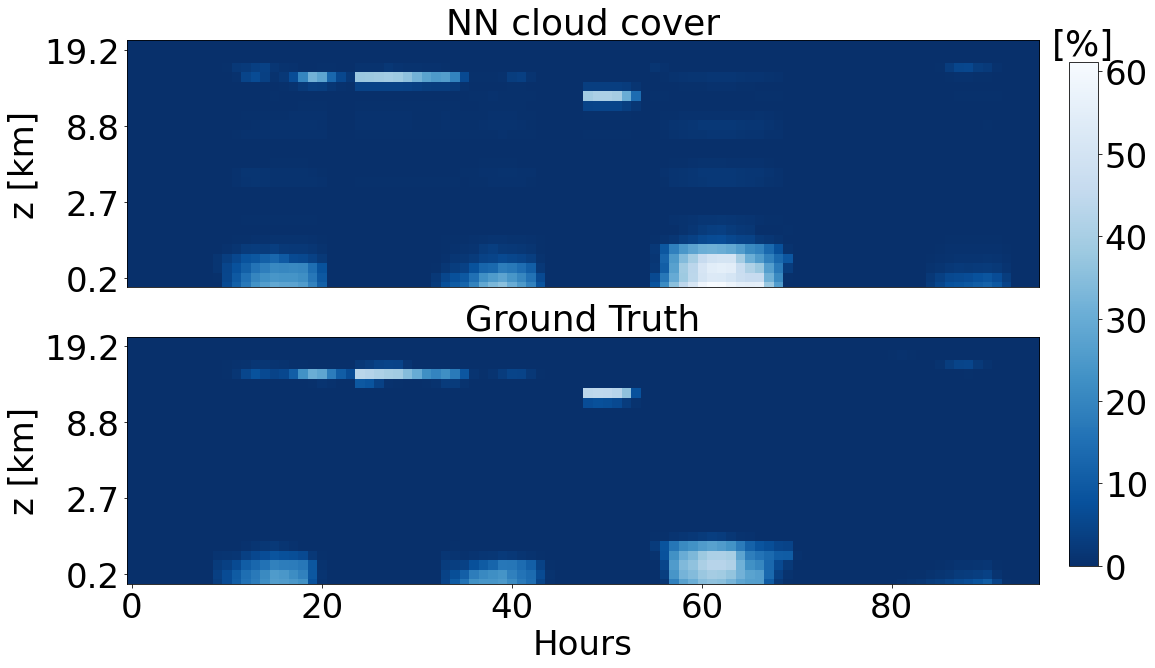

In [39]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

# # With a huge font for the presentation
# fontsize = 25
# plt.rc('font', size=fontsize) #controls default text size
# plt.rc('axes', titlesize=fontsize) #fontsize of the title
# plt.rc('axes', labelsize=fontsize) #fontsize of the x and y labels
# plt.rc('xtick', labelsize=fontsize) #fontsize of the x tick labels
# plt.rc('ytick', labelsize=fontsize) #fontsize of the y tick labels
# plt.rc('legend', fontsize=fontsize) #fontsize of the legend

# matrix = np.zeros((96, 32)) #np.zeros((745, 31))
# matrix_data = np.zeros((96, 32))
# matrix[:, 5:] = pred_clc[:96]
# matrix_data[:, 5:] = true_clc[:96, 4:]
# Crucial so that the colorbar will actually match both plots
vmax = np.maximum(np.max(matrix), np.max(matrix_data))
vmin = np.minimum(np.min(matrix), np.min(matrix_data))
# t = np.linspace(1, 25, 25)
# v = np.linspace(9, 75)
# T, V = np.meshgrid(t, v)
fig = plt.figure(figsize=(20,10))
ax_2 = fig.add_subplot(212, xlabel='Hours', ylabel='z [km]', ylim=[31, 5], yticks=[6,14,22,30],
                       title='Ground Truth')
im = ax_2.imshow(np.transpose(matrix_data),vmin=vmin, vmax=vmax, cmap='Blues_r')
ax_2.set_yticklabels(zg_mean_narval[np.array([6,14,22,30])-5])
# # Colorbar axes
# divider = make_axes_locatable(ax_2)
# cax_2 = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(ims_2, cax=cax_2)
#fig.colorbar(ims_2)
ax_1 = fig.add_subplot(211, ylabel='z [km]', ylim=[31, 5], xticks=[], yticks=[6,14,22,30],
                       title='NN cloud cover')
im = ax_1.imshow(np.transpose(matrix), vmin=vmin, vmax=vmax, cmap='Blues_r')
ax_1.set_yticklabels(zg_mean_narval[np.array([6,14,22,30])-5])
# # Colorbar axes
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])

#([0.85, 0.15, 0.05, 0.7])
# divider = make_axes_locatable(cbar_ax)
# cax_1 = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(im, cax=cbar_ax)
cb.ax.set_title('[%]')
# fig.colorbar(ims_1)
# fig.savefig('figures/offline_testing_column_in_beginning_of_august.pdf')